##  Исследование рынка заведений общественного питания Москвы

**Инвесторы из фонда "Shut Up and Take My Money" решили открыть заведение в городе с учетом актуальных трендов на рынке общепита.**

**В распоряжении данные заведений общественного питания в городе Москве (по состоянию на лето 2022 г.), собранные при помощи сервисов Яндекс Карты и Яндекс Бизнес для исследования местного рынка.** 

### Цель, задачи и алгоритм действий

Данное исследование направлено на выявление актуальных тенденций и закономерностей на рынке общественного питания Москвы. 

Посредством решения данной задачи ставится цель выявить, открытие какого типа заведения является наиболее перспективным для инвесторов.

Для достижения поставленной цели будут предприняты следующие шаги: 

      -открытие и изучение файла;
      -предобработка данных, включающая в себя изучение типов данных в датафрейме, его изменение в случае необходимости,
      проверка датафрейма на наличие пропусков, а также дубликатов (как явных, так и неявных);
      -добавление в датафрейм столбцов с названием улицы, где расположено заведение, и идентификатором круглосуточных 
      заведений;
      -выявление количества уникальных заведений в датафрейме;
      -выявление количества уникальных заведений с более чемодной локацией в городе;
      -исследование аномалий в значениях среднего чека и количества посадочных мест;
      -исследование категорий значений и наиболее распространенных из них посредством визуализации данных; 
      -изучение медианного количества посадочных мест в зависимосит от категории заведения;
      -исследование соотношения сетевых и несетвых заведений в городе посредством визуализации данных;
      -изучение 15 самых популярных сетей в Москве и наиболее распространенных среди сетей категорий заведений;
      -исследование географии заведений, в частности, рассмотрение округов, в которых расположены заведения, и расчет 
      количества заведений каждой категории в 9 округах;
      -изучение распределения средних рейтингов по категориям заведений;
      -исследование рейтинга заведений в зависимости от того, в каком округе те расположены посредством построения
      фоновой картограммы;
      -визуализация кластеров заведений на карте Москвы;
      -выявление 15 улиц с наибольшим количеством заведений и выявление на них количества заведений каждой 
      категории посредством визуализации;
      -исследование улиц с одним заведением, в частности, расчет их количества, рассмотрение наиболее популярных 
      на них категорий заведений, а также сравнение показателей с городом в целом;
      -исследование медианы среднего чека по округам Москвы и построение фоноаой картограммы;
      -выявление количества кофеен в датафрейме, выявление степени их распространенности в разных округах Москвы и 
      изучение их графиков работы.
     
      

In [1]:
import pandas as pd #импортируем бибилиотеку pandas для работы с датафреймом
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import matplotlib.pyplot as plt #импортируем библиотеку matpolib.byplot для того, чтобы в дальейшем присваивать осям и самим графикам названиям
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import folium
import json

## Изучение файла и предобработка данных

In [2]:
try:
    data = pd.read_csv('/datasets/moscow_places.csv')
except:
    data = pd.read_csv('moscow_places.csv')

In [3]:
def dataframe_info(data):
    display(data.head(), data.info(), data.describe()), \
    print('Количество дубликатов в датафрейме:', data.duplicated().sum())
    

In [4]:
dataframe_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


None

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


Количество дубликатов в датафрейме: 0


**С типами данных все в порядке. Никакие изменения не будут проводиться.**

### Изучение пропусков

**Напишем функцию для того, чтобы на графике отобразить долю пропущенных значений в каждом столбце датафрейма data.**

In [5]:
def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(20,6), rot = -5, legend = False, fontsize = 15, color='#66c2a5')
            .set_title('Количество пропусков в датафрейме' + "\n", fontsize = 22)    
        );    
    except:
        print('пропусков не осталось :) ')

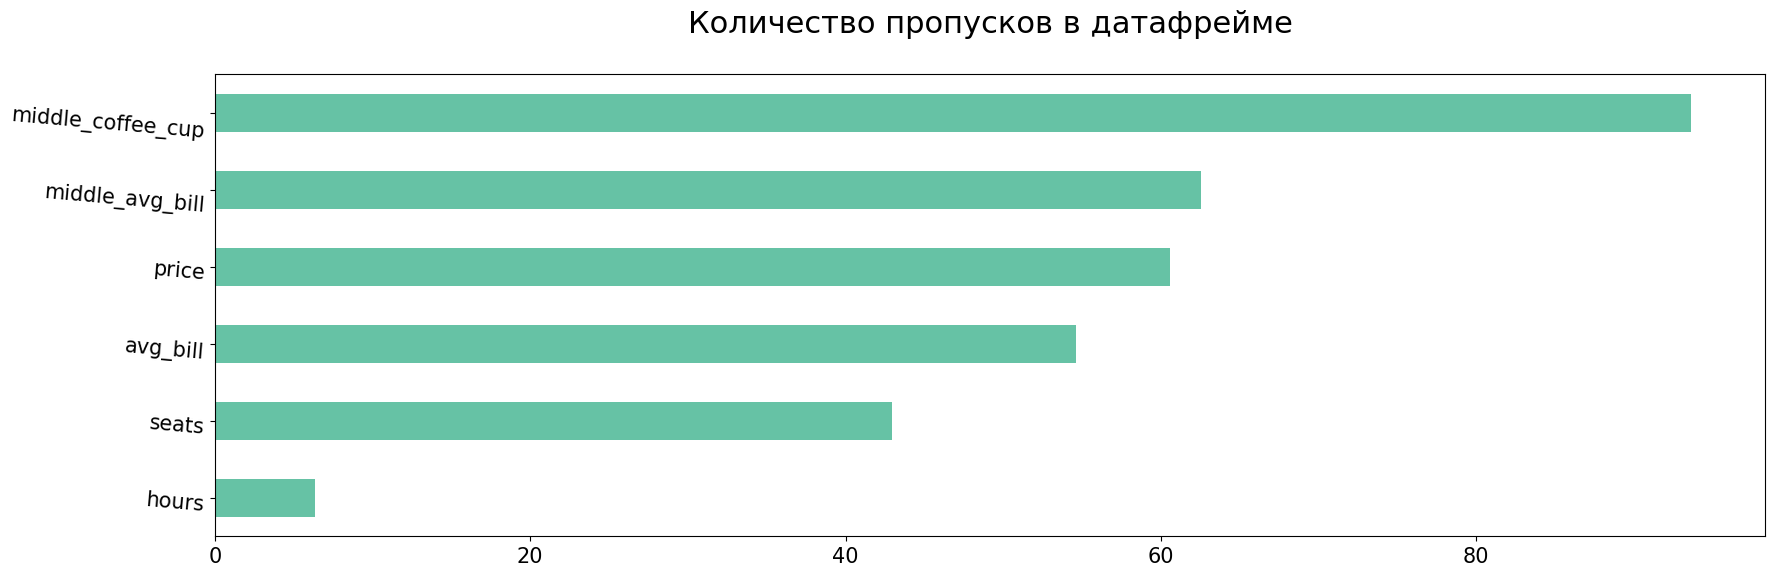

In [6]:
pass_value_barh(data)

**Как видно на графике, в столбце, содержащем числа с оценкой одной чашки капучино (middle_coffee_cup), отсутствует более 80% значений. В столбцах с оценкой среднего чека (middle_avg_bill) и категорией заведения (price), а также средней стоимостью заказа (avg_bill) доля пропусков превышает 50%. Также отсутствует более 40% значений в столбце с количеством посадочных мест. В силу этого фактически нет смысла заполнять в них пропуски. Мы также не можем применить логическую индексацию для замены пропусков медианным значением с учетом какого-либо стороннего параметра, так как средний чек и категорию заведения нельзя связать с местностью: на одной улице могут быть заведения как с низким, так и высоким рейтингом, также как и с низким и высоким средним чеком. Принято решение оставить пропуски.** 

### Изучение дубликатов

**В датафрейме отсутствуют явные дубликаты.Приведем к нижнему регистру названия заведений для того, чтобы найти неявные.**

In [7]:
data['name'] = data['name'].str.lower()

**Найдем количество заведений, у которых совпадает название и адрес.**

In [8]:
print('Количество дубликатов:', data.duplicated(subset=['name', 'address']).sum())

Количество дубликатов: 3


**Удалим их из датафрейма.**

In [9]:
data = data.drop_duplicates(subset=['name','address'], keep='first').reset_index()


### Изучение заведений

In [10]:
print('Количество уникальных заведений:', data.name.nunique())

Количество уникальных заведений: 5512


In [11]:
print('Количество заведений с более чем одной локацией:',len(data.groupby('name').agg({'address':'count'}).query('address > 1')))

Количество заведений с более чем одной локацией: 752


### Добавление столбцов

**При помощи метода split() и цикла добавим столбцев с названием улицы, на которой расположено заведение.**

In [12]:
data['street']=[x.split(', ')[1]
for x in data['address'].values]

In [13]:
#Код ревьюера
data.query('street == "проспект Мира"')

,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
718,718,все лень,ресторан,"Москва, проспект Мира, 119, стр. 528",Северо-Восточный административный округ,"пн-чт 12:00–21:00; пт,сб 12:00–22:00; вс 12:00...",55.836107,37.614875,4.4,выше среднего,Средний счёт:от 1500 ₽,1500.0,NaN,0,NaN,проспект Мира
786,786,старое место,кафе,"Москва, проспект Мира, 119, стр. 504",Северо-Восточный административный округ,"ежедневно, 11:00–22:00",55.837212,37.616469,4.1,средние,Средний счёт:900–1100 ₽,1000.0,NaN,0,NaN,проспект Мира
792,792,doner one,кафе,"Москва, проспект Мира, 119, стр. 596",Северо-Восточный административный округ,"ежедневно, 11:00–21:00",55.839037,37.613027,4.2,NaN,NaN,NaN,NaN,0,NaN,проспект Мира
800,800,пян-се,быстрое питание,"Москва, проспект Мира, 119, стр. 27",Северо-Восточный административный округ,"ежедневно, 10:00–20:00",55.834563,37.613549,4.4,NaN,NaN,NaN,NaN,1,NaN,проспект Мира
909,909,космос,кафе,"Москва, проспект Мира, 119, стр. 34",Северо-Восточный административный округ,вт-вс 10:45–21:00,55.835060,37.622033,3.8,NaN,NaN,NaN,NaN,0,NaN,проспект Мира
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,2568,ice embassy,кафе,"Москва, проспект Мира, 26, стр. 2",Центральный административный округ,"ежедневно, круглосуточно",55.777311,37.636400,4.4,NaN,NaN,NaN,NaN,0,273.0,проспект Мира
2569,2571,"халва, сеть почтоматов",кафе,"Москва, проспект Мира, 146",Северо-Восточный административный округ,пн-пт 10:00–19:00,55.820575,37.641970,3.6,NaN,NaN,NaN,NaN,0,18.0,проспект Мира
2570,2572,ресторан,ресторан,"Москва, проспект Мира, 62, стр. 1",Центральный административный округ,NaN,55.785618,37.635511,4.3,NaN,NaN,NaN,NaN,0,200.0,проспект Мира
4779,4782,food embassy,ресторан,"Москва, проспект Мира, 26, стр. 2",Центральный административный округ,"ежедневно, 10:00–00:00",55.777224,37.636288,4.5,высокие,Средний счёт:2500–3000 ₽,2750.0,NaN,0,273.0,проспект Мира


**Добавим столбец с булевыми значениями для отображения заведений, работающих круглосуточно и ежедневно.**

In [14]:

data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно')

**Выведем на экран первые 5 строк датафрейма после добавления новых столбцов.**

In [15]:
data.head()

,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко,False
1,1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко,False
2,2,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,Клязьминская улица,False
3,3,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
4,4,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,Правобережная улица,False


### Исследование аномалий

**Отсортируем датафрейм по среднему чеку и выведем топ-10 заведений по этому показателю.**

**У кафе на Каширском шоссе средний чек составляет 35 тысяч рублей, что почти на 200% выше, чем у заведений, занимающих 2-е и 3-е места несмотря на то, что в тех цены также на высоком уровне.**

In [16]:
data.sort_values(by='middle_avg_bill', ascending=False).head(10)

,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
7174,7177,кафе,ресторан,"Москва, Каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",55.657450,37.646665,4.1,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,0,100.0,Каширское шоссе,True
730,730,чойхона,"бар,паб","Москва, Дмитровское шоссе, 95А",Северный административный округ,"ежедневно, 10:00–23:00",55.871497,37.543555,4.4,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,0,49.0,Дмитровское шоссе,False
5478,5481,гости,ресторан,"Москва, шоссе Энтузиастов, 52",Восточный административный округ,"пн,вс 18:00–22:30",55.759088,37.760570,4.1,высокие,Средний счёт:5000–15000 ₽,10000.0,NaN,0,NaN,шоссе Энтузиастов,False
3879,3882,white rabbit,ресторан,"Москва, Смоленская площадь, 3",Центральный административный округ,"ежедневно, 12:00–00:00",55.747608,37.581248,4.9,высокие,Средний счёт:7000–7500 ₽,7250.0,NaN,0,150.0,Смоленская площадь,False
3484,3487,800°с contemporary steak,ресторан,"Москва, Большой Патриарший переулок, 6, стр. 1",Центральный административный округ,"ежедневно, 09:00–23:30",55.762708,37.592138,4.7,высокие,Средний счёт:6000–8000 ₽,7000.0,NaN,0,75.0,Большой Патриарший переулок,False
3393,3396,марио,ресторан,"Москва, улица Климашкина, 17",Центральный административный округ,"ежедневно, 12:00–00:00",55.767792,37.568453,4.5,высокие,Средний счёт:7000 ₽,7000.0,NaN,0,100.0,улица Климашкина,False
3515,3518,чайка,ресторан,"Москва, Краснопресненская набережная, 12А",Центральный административный округ,"ежедневно, 12:00–00:00",55.752857,37.556365,4.8,высокие,Средний счёт:5000–8000 ₽,6500.0,NaN,1,250.0,Краснопресненская набережная,False
3907,3910,кантинетта антинори,ресторан,"Москва, Денежный переулок, 20",Центральный административный округ,"ежедневно, 12:00–00:00",55.745383,37.586595,4.7,высокие,Средний счёт:6000 ₽,6000.0,NaN,0,80.0,Денежный переулок,False
2793,2795,крошка картошка,быстрое питание,"Москва, Щёлковское шоссе, вл75",Восточный административный округ,"ежедневно, 10:00–22:00",55.811160,37.799823,4.0,высокие,Средний счёт:1000–10000 ₽,5500.0,NaN,1,NaN,Щёлковское шоссе,False
3600,3603,lucky izakaya bar,"бар,паб","Москва, Калашный переулок, 9",Центральный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",55.757313,37.599581,4.8,высокие,Средний счёт:5500 ₽,5500.0,NaN,0,NaN,Калашный переулок,False


In [17]:
data = data.query('middle_avg_bill != 35000')

**Построим диаграмму размаха для того, чтобы изучить, как распределены значения количества мест.**

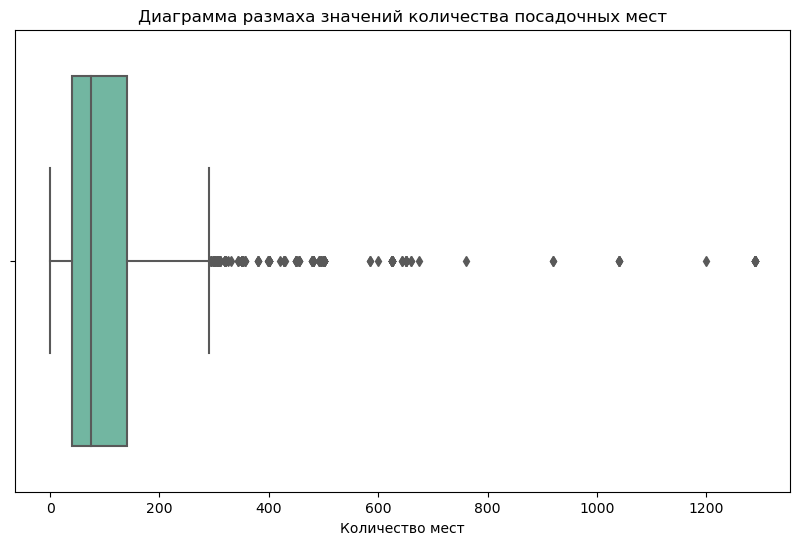

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['seats'],color='#66c2a5');
plt.title('Диаграмма размаха значений количества посадочных мест')
plt.xlabel('Количество мест')
plt.show();


**Медианное значение составялет около 50 посадочных мест, а их количество в 75 % случаев не превышает 150. Максимальное значение составляет около 300. На графике видно наличие большого количества аномалий. В некоторых случаях количество посадочных мест превышало 600. Даже в больших торговых центрах и фудкортах не всегда бывает так много мест. Удалим места, где количество мест превышает 600.**

In [19]:
data = data.query('seats <= 600 | seats.isnull()') 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8349 entries, 0 to 8402
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8349 non-null   int64  
 1   name               8349 non-null   object 
 2   category           8349 non-null   object 
 3   address            8349 non-null   object 
 4   district           8349 non-null   object 
 5   hours              7821 non-null   object 
 6   lat                8349 non-null   float64
 7   lng                8349 non-null   float64
 8   rating             8349 non-null   float64
 9   price              3295 non-null   object 
 10  avg_bill           3793 non-null   object 
 11  middle_avg_bill    3132 non-null   float64
 12  middle_coffee_cup  529 non-null    float64
 13  chain              8349 non-null   int64  
 14  seats              4738 non-null   float64
 15  street             8349 non-null   object 
 16  is_24/7            7821 

## Анализ данных

### Исследование категорий заведений

**Выведем на экран все категории.**

In [20]:
data.category.unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [21]:
print('Количество категорий значений:',data.category.nunique())

Количество категорий значений: 8


**Построим столбчатую диаграмму для того, чтобы выявить наиболее распространенные категории заведений.**

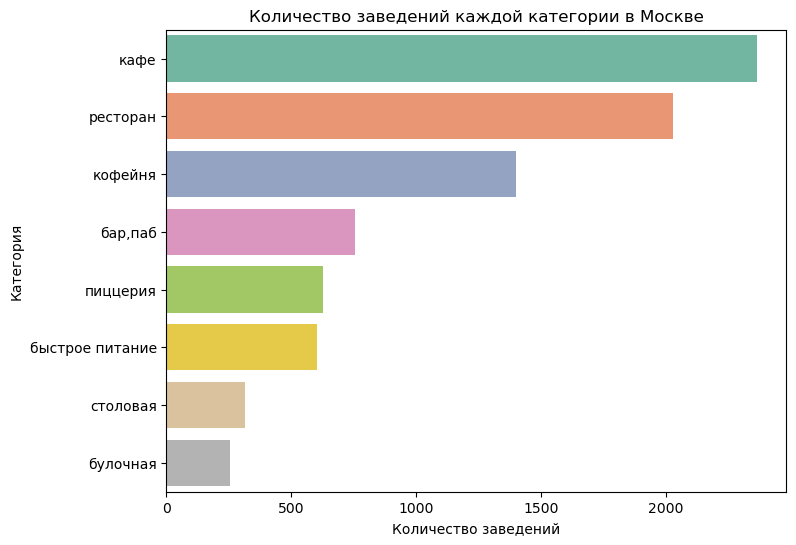

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

category_count = pd.DataFrame(data['category'].value_counts()).reset_index()

sns.barplot(data = category_count, x='category', y='index', palette='Set2')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.title('Количество заведений каждой категории в Москве')
plt.show()

**Как видно на графике, самыми распространенными в городе являются кафе: таких заведний, согласно Яндекс.Картам, в городе 2365. В Москве также более 2 тыс. ресторанвв. Тройку лидеров замыкают кофейни: выявлено 1401 заведения данной категории. Баров/пабов почтив 2 раза меньше, чем кофеен. Почти совпадает количество ресторанов быстрого питания и пиццерий. В 2 раза меньше количество столовых по сравнению с ресторанами быстрого питания. Реже всего в городе встречаются булочные.**

### Исследование количества посадочных мест в зависимости от категории заведения

**Построим столбчатую диаграмму медианного количества посадочных мест по категориям заведений.**

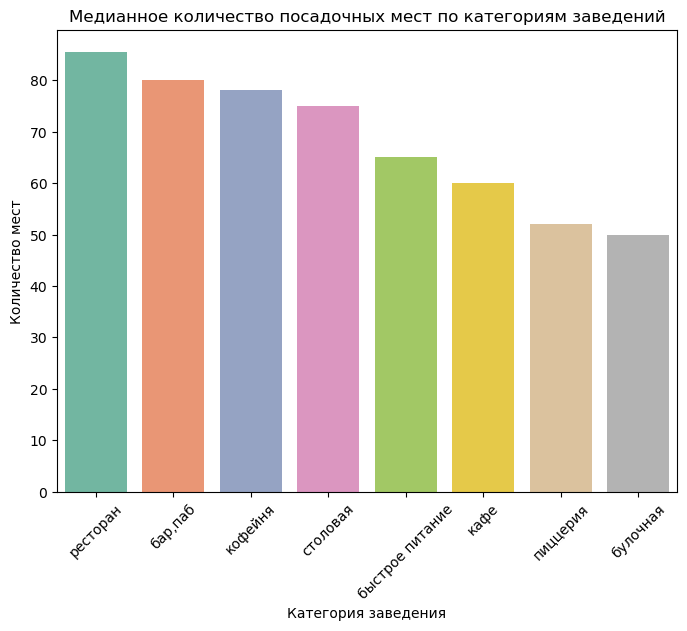

In [23]:
category_seats = data.pivot_table(index='category', values='seats', aggfunc='median').sort_values(by='seats',ascending=False)
category_seats = category_seats.reset_index()
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=category_seats, x='category', y='seats',palette='Set2')
plt.title('Медианное количество посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show();

**Больше всего посадочных мест в ресторанах, барах/пабах и кофейнях. Стоит обратить внимание на то, что в кафе мест меньше, чем кофейнях. Скорее всего, это связано с тем, что многие кофейни расположены в фудкортах, где всегда много мест. Обычно если кофейни расположены в отдельном помещении, то они занимают небольшую площадь, где число посадочных мест редко бывает больше 20-30.**

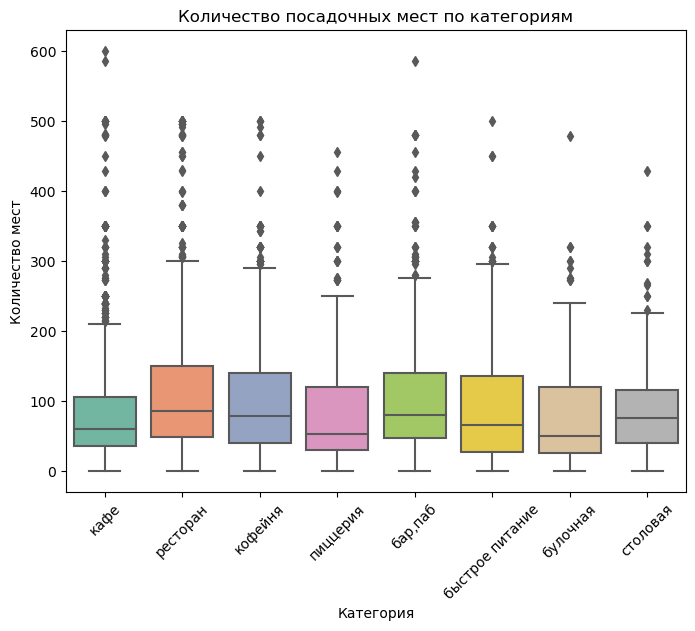

In [24]:
palette = sns.color_palette('Set2')

fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(x='category', y='seats', data=data, palette=palette)

plt.title('Количество посадочных мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show();

**Анализируя диаграмму размаха значений количества посадочных мест, можно сделать вывод о присутствии фудкортов в датафрейме: на это указывают выбросы в каждой категории заведений. Отсутствуют значительные различия между категориями по количеству посадочных мест: медианные значения почти совпадают у ресторанов, кофеен и баров/пабов, а также у кафе и пиццерий. При этом у кафе наименьшее максимальное значение количества посадочных мест: разница с рестораном и кофейней составляет около 90-100 мест.Если для ресторанов большое количество посадочных мест является нормальным явлением, то в случае кофеен это, как было выше сказано, указывает, скорее всего, на то, что они расположены в фудкортах. Удалять большие значения нельзя: фудкорты не искажают картину рынка, а, наоборот, характеризуют одну из его особенностей.**

### Изучение соотношения сетевых и сетевых заведений

**Построим столбчатую диаграмму количества сетевых и несетвых заведений.**

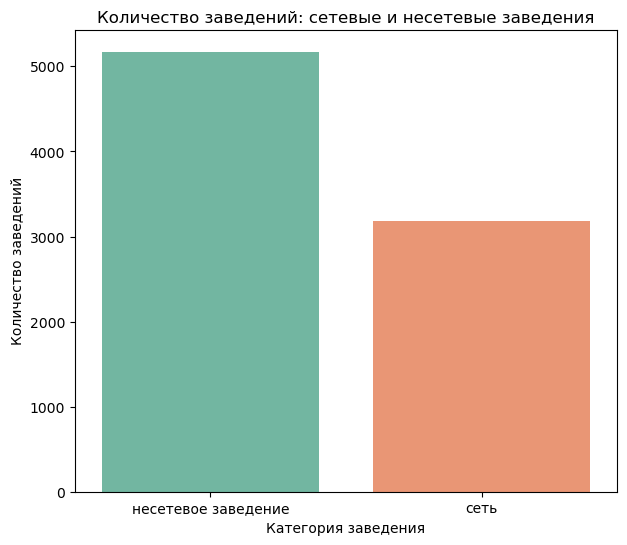

In [25]:
#для удобства изменим значений в столбце chain
data['chain'] = data['chain'].replace(0, 'несетевое заведение')
data['chain'] = data['chain'].replace(1, 'сеть')


chain_info = data.pivot_table(index='chain', values='name', aggfunc='count').reset_index()
fig, ax = plt.subplots(figsize=(7,6))
sns.barplot(data=chain_info, x='chain', y='name',palette='Set2')
plt.title('Количество заведений: cетевые и несетевые заведения')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')

plt.show();

**В городе преобладают несетевые заведения. Их на 2 тыс. больше, чем сетевых.**

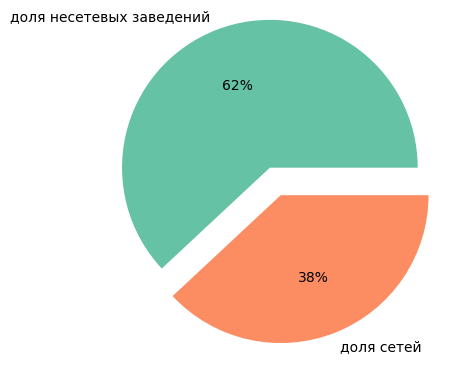

In [26]:
info = [5172, 3177]
labels = ['доля несетевых заведений', 'доля сетей']

#define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:2]
myexplode = [0.2, 0]

#create pie chart
plt.pie(info, labels = labels, colors = colors, explode=myexplode, autopct='%.0f%%')
plt.show()


**Как видно на круговой диаграмме, в Москве 38% заведений относятся к сети, в то время как несетвыми является почти 62%.**

### Исследование  категорий сетевых заведний

**Создадим сводную таблицу с количеством сетевых заведений каждой категории и их долей от общего количества заведений (по категориям).**

In [27]:
chain_info = data.query('chain == "сеть"')
chain_info = chain_info.groupby('category').agg({'name':'count'}).sort_values(by='name',ascending=False)
chain_info = chain_info.reset_index()
chain_info.columns = [
    'category',
    'chain'
]
#создадим таблицу с общим количеством заведений каждой категории
category_total = data.pivot_table(index='category', values='name',aggfunc='count').reset_index() 

chain_info = chain_info.merge(category_total, on='category', how='right') #объединяем таблицы
chain_info.columns = [
    'category',
    'chain',
    'total'
]
#добавим столбец с долей сетевых заведений каждой категории
chain_info['chain_perc'] = round((chain_info['chain']/ chain_info['total'] * 100),2)
chain_info = chain_info.sort_values(by='chain_perc',ascending=False)
chain_info


,category,chain,total,chain_perc
1,булочная,156,255,61.18
5,пиццерия,328,629,52.15
4,кофейня,713,1401,50.89
2,быстрое питание,231,602,38.37
6,ресторан,721,2029,35.53
3,кафе,774,2365,32.73
7,столовая,87,313,27.80
0,"бар,паб",167,755,22.12


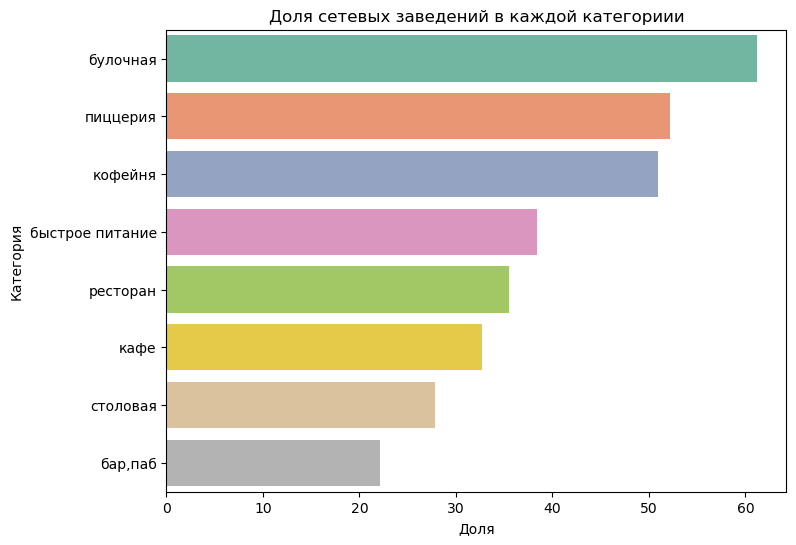

In [28]:
# строим столбчатую диаграмму 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=chain_info, x='chain_perc', y='category',palette='Set2')
plt.title('Доля сетевых заведений в каждой категориии')
plt.xlabel('Доля')
plt.ylabel('Категория')
plt.show();

**Больше половины кофеен,пиццерий и булочных в Москве входят в сети. Реже всего сетевые заведения встречаются среди баров/пабов, столовых и кафе.**

**Аналогично сделаем сводную таблицу для несетевых заведений.**

In [29]:
not_chain_info = data.query('chain == "несетевое заведение"')
not_chain_info = not_chain_info.groupby('category').agg({'name':'count'}).sort_values(by='name',ascending=False)
not_chain_info = not_chain_info.reset_index()
not_chain_info.columns = [
    'category',
    'not_chain'
]

not_chain_info = not_chain_info.merge(category_total, on='category', how='right')
not_chain_info.columns = [
    'category',
    'not_chain',
    'total'
]
not_chain_info['not_chain_perc'] = round((not_chain_info['not_chain']/ not_chain_info['total'] * 100),2)
not_chain_info = not_chain_info.sort_values(by='not_chain_perc',ascending=False)
not_chain_info

,category,not_chain,total,not_chain_perc
0,"бар,паб",588,755,77.88
7,столовая,226,313,72.20
3,кафе,1591,2365,67.27
6,ресторан,1308,2029,64.47
2,быстрое питание,371,602,61.63
4,кофейня,688,1401,49.11
5,пиццерия,301,629,47.85
1,булочная,99,255,38.82


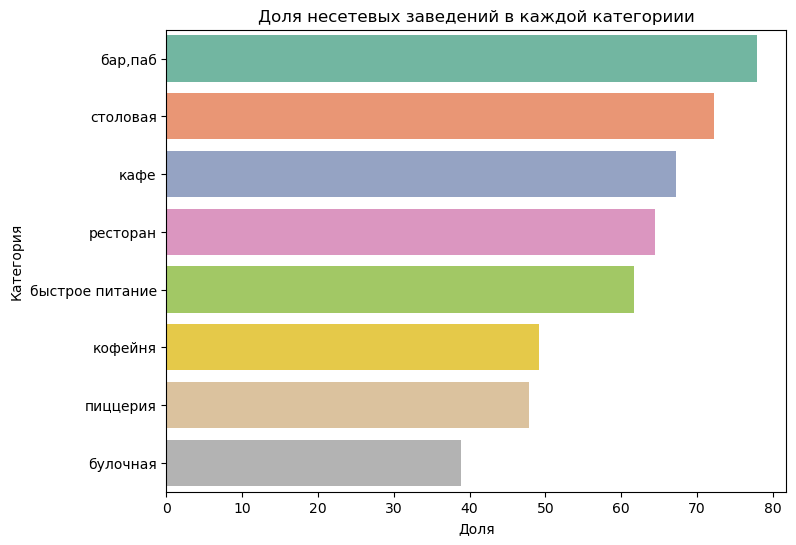

In [30]:

# строим столбчатую диаграмму 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=not_chain_info, x='not_chain_perc', y='category',palette='Set2')
plt.title('Доля несетевых заведений в каждой категориии')
plt.xlabel('Доля')
plt.ylabel('Категория')
plt.show();


**Более 70% всех столовых и баров/пабов являются несетвыми заведениями. В это же время менее половины булочных, пиццерий и кофеен принадлежат к какой-либо сети.**

### Исследование топ-15 самых популярных сетей в Москве

**Построим круговую столбчатую диаграмму топ-15 сетей в городе.**

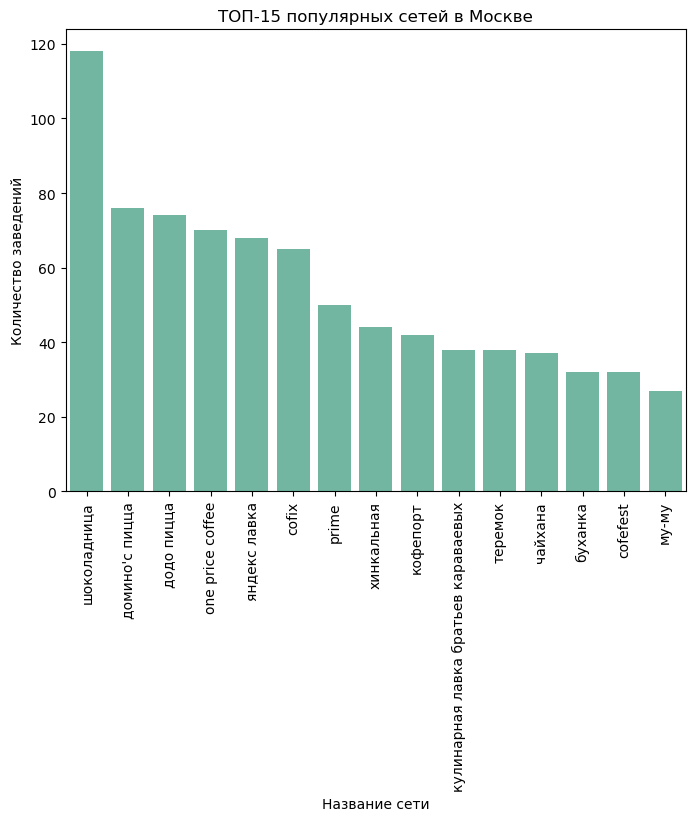

In [31]:
chain_data = data.query('chain == "сеть"') #отфильтруем данные 
top_fifteen = pd.DataFrame(chain_data['name'].value_counts()).reset_index().head(15) 

# строим столбчатую диаграмму 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=top_fifteen, x='index', y='name',color='#66c2a5')
plt.title('ТОП-15 популярных сетей в Москве')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.xticks(rotation=90)
plt.show();


**Лидером является сеть "Шоколадница": у этой сети в Москве 118 локаций. Второе место "Домино'с Пицца" (76 точек), а третье - "Додо Пицца" (74 точки).** 

**Теперь рассмотрим, как распространены категории заведений среди сетей.**

In [32]:
top_fifteen['category'] = data['category']
cafe_chain_count = top_fifteen.loc[top_fifteen['category'] == 'кафе']
pizzeria_chain_count = top_fifteen.loc[top_fifteen['category'] == 'пиццерия']
restaurant_chain_count = top_fifteen.loc[top_fifteen['category'] == 'ресторан']
bar_chain_count = top_fifteen.loc[top_fifteen['category'] == 'бар,паб']
coffeeshop_chain_count = top_fifteen.loc[top_fifteen['category'] == 'кофейня']
fastfood_chain_count = top_fifteen.loc[top_fifteen['category'] == 'быстрое питание']
bakery_chain_count = top_fifteen.loc[top_fifteen['category'] == 'булочная']
print('Количество сетевых кафе:', len(cafe_chain_count))
print('Количество сетевых пиццерий:', len(pizzeria_chain_count))
print('Количество сетевых ресторанов;', len(restaurant_chain_count))
print('Количество сетевых баров/пабов:', len(bar_chain_count))
print('Количество сетевых кофеен:', len(coffeeshop_chain_count))
print('Количество сетевых заведений быстрого питания:', len(fastfood_chain_count))
print('Количество сетевых булочных:', len(bakery_chain_count))

Количество сетевых кафе: 5
Количество сетевых пиццерий: 2
Количество сетевых ресторанов; 2
Количество сетевых баров/пабов: 3
Количество сетевых кофеен: 1
Количество сетевых заведений быстрого питания: 1
Количество сетевых булочных: 1


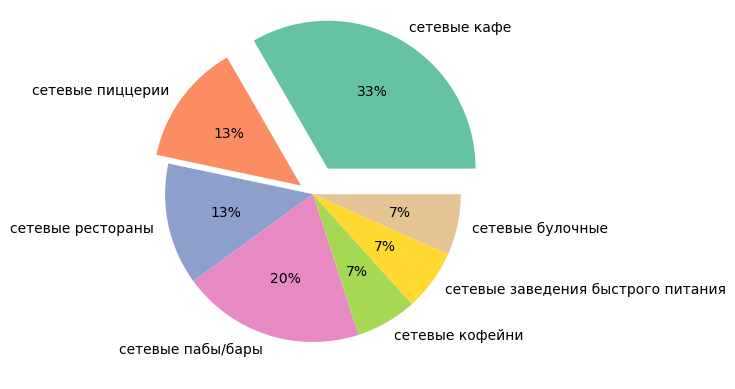

In [33]:
info = [5, 2, 2, 3, 1, 1, 1]
labels = ['сетевые кафе', 'сетевые пиццерии', 'сетевые рестораны',
          'сетевые пабы/бары', 'сетевые кофейни', 'сетевые заведения быстрого питания',
          'сетевые булочные']

#define Seaborn color palette to use
colors = sns.color_palette('Set2')
myexplode = [0.2, 0.1, 0, 0, 0, 0, 0]

#create pie chart
plt.pie(info, labels = labels, colors = colors, explode=myexplode, autopct='%.0f%%')
plt.show()


**33% всех заведений среди топ-15 сетей составляют кафе. Второе место (13 %) занимают пиццерии и сетевые рестораны. Примечательно, что  топ-3 категорий в 15 самых популярных сетях отличается от топ-3 в целом по городу: во втором случае тройку лидеров замыкакают кофейни и пиццерии расположены на 5-ом месте. Среди топ-15 сетей кофейни занимают 5-ое место.** 

### Изучение географии заведений

**Сначала узнаем, в каких административных районах расположены представленные в датарфейм заведения.**

In [34]:
data.district.unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

**Похоже, что в датафрейме есть данные только заведениях, расположенных в пределах МКАД.**

In [35]:
print('Количество административных районов:', data.district.nunique())

Количество административных районов: 9


**Отобразим общее количество заведений в каждом административном районе.**

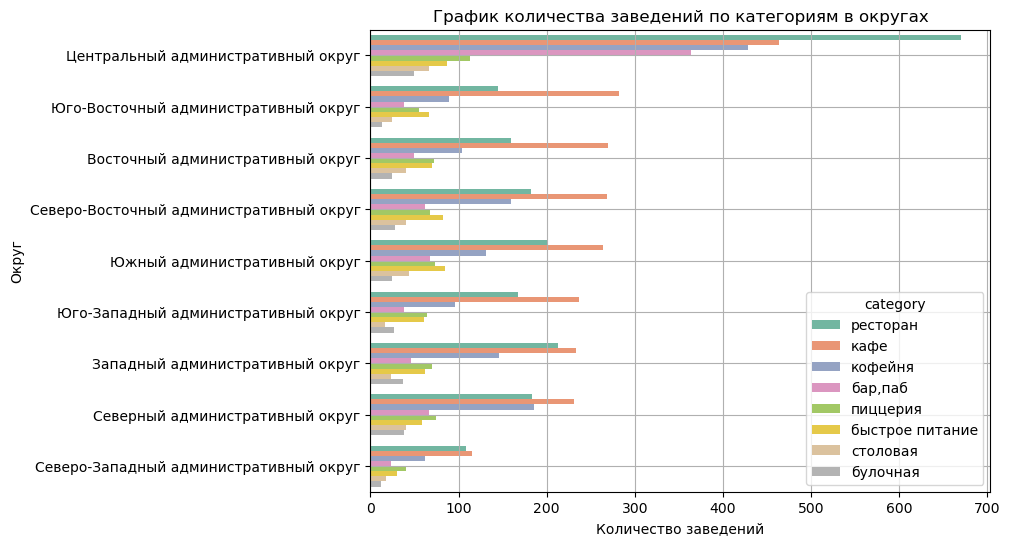

In [36]:
# назначаем размер графика
plt.figure(figsize=(8, 6))

# группируем данные по образованию и задолженности и считаем медианный доход
district_data = data.groupby(['district', 'category'], \
                        as_index = False)[['name']].count().sort_values(by='name',ascending=False)

# строим столбчатый график средствами seaborn
sns.barplot(x='name', y='district', data=district_data, hue='category', palette='Set2')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График количества заведений по категориям в округах')
plt.xlabel('Количество заведений')
plt.ylabel('Округ')
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

**Во всех округах за исключением ЦАО наблюдается единая тенденция: cамой распространенной категорией является кафе, второе место занимают рестораны, третье - кофейни. В центре города с большим отрывом лидируют рестораны: их на 200 больше, чем кафе. Также в ЦАО довольно распространены бары и пабы; в других округах эта категория заведений занимает 6-ое место.**

### Изучение распределения средних рейтингов по категориям заведений

**Построим столбчатую диаграмму.**

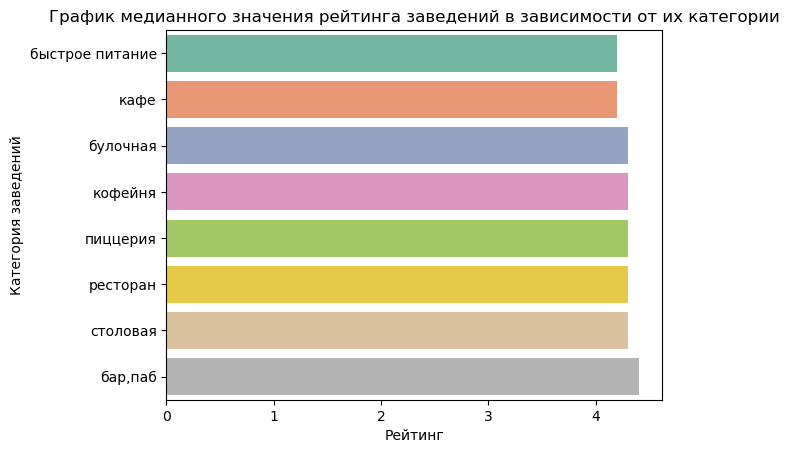

In [37]:
rating_data = data.groupby(['category'], \
                        as_index = False)[['rating']].median().sort_values(by='rating',ascending=True)

sns.barplot(data=rating_data, x='rating', y='category', palette='Set2')
plt.xlabel('Рейтинг')
plt.ylabel('Категория заведений')
plt.title('График медианного значения рейтинга заведений в зависимости от их категории')
plt.show()

**Дополним ее диаграммой размаха.**

In [ ]:
sns.boxplot(x='category', y='rating', data=data, palette='Set2')
plt.title('Количество посадочных мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show();

**Самый высокий рейтинг у баров/пабов - 4.4. У столовых, ресторанов, пиццерий, кофеен и булочных рейтинг совпадает: 4.3. У кафе и ресторанов быстрого питания  самый низкий рейтинг - 4.2. Чаще всего аномально низкие значения рейтинга встречаются среди кафе, ресторанов и заведений быстрого питания. Минимальное значение рейтинга у ресторанов быстрого питания, а максимальное - у кафе.**

### Изучение среднего рейтинга заведений в зависимости от административного округа

**Создадим сводную таблицу для расчета медианного рейтинга заведений по округам.**

In [ ]:
district_rating = data.pivot_table(index='district', values='rating', aggfunc='median').reset_index()


**Теперь построим фоновую картограмму, чтобы визуализировать зависимость рейтинга заведений от их расположения.**

In [ ]:
# импортируем карту и хороплет
from folium import Map, Choropleth


state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    #fill_color='YlGn',
    #fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

**Самый высокий рейтинг у заведений, расположенных в центре Москвы. В ВАО, САО, СЗАО, ЮАО, ЮЗАО рейтинг заведений  находится на одном уровне. Самый низкий рейтинг в ЮВАО и САО.**

### Визуализация кластеров заведений

**Для того, чтобы наглядно визуализировать все заведения в Москве, создадим карту с кластерами.**

In [ ]:
# импортируем карту и маркер
from folium import Map, Marker
# импортируем кластер
from folium.plugins import MarkerCluster

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m

### Изучение топ-15 улиц по количеству заведений

**Получим сведения о 15 улицах c наибольшим количеством заведений и построим по ним столбчатую диаграмму.**

In [ ]:
top_15= data.pivot_table(index='street',values = 'name', aggfunc = 'count').sort_values(by='name',ascending=False).reset_index().head(15)
top_15 = top_15.sort_values(by='name',ascending=False)

# строим столбчатую диаграмму 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=top_15, x='street', y='name',color='#66c2a5')
plt.title('Топ-15 улиц по количеству заведений')
plt.xlabel('Улиц')
plt.ylabel('Количество заведений')
plt.xticks(rotation=90)
plt.show();
 

**По количеству заведений лидирует проспект Мира; отрыв от 2-го места (Профсоюзная улица) занимает 61 заведение. Тройку лидеров замыкает Ленинский проспект. Большинство в топ-15 составлят шоссе и проспекты, т.е. длинные улицы с большим автомобильным потоком. Из центра только одна улица - Пятницкая.**

**Теперь узнаем, сколько заведений каждой категории расположены на топ-15 улицах.**

In [ ]:
top15_categories = data[data['street'].isin(top_15['street'])].pivot_table(index=['street','category'], \
                                                                           values='name', aggfunc='count').reset_index()


# строим столбчатый график средствами seaborn
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='name', y='street', data=top15_categories, hue='category', palette='Set2')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество заведений по категориям на топ-15 улицах')
plt.xlabel('Количество заведений  по категориям')
plt.ylabel('Улица')
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

**На каждой из топ-15 улиц в тройку категорий-лидеров по количеству заведений входят рестораны, кафе и кофейни.**

### Исследование улиц с одним заведением

**Сгруппируем датафрейм по улицам и ограничим улицы только теми, где расположено только одно заведение.**

In [ ]:
one_spot = data.groupby('street').agg({'name':'count'}).query('name < 2').reset_index()
print('Количество улиц с одним заведением:', len(one_spot))


**Отфильтруем датафрейм таким образом, чтобы в нем была информация только об улицах с одним заведением.**

In [ ]:
one_spot_data =  data[data['street'].isin(one_spot['street'])].reset_index()
one_spot_data.head()

**Посмотрим, какие категории заведений чаще всего встречаются на таких улицах.**

In [ ]:
spot1_category_count = pd.DataFrame(one_spot_data['category'].value_counts()).reset_index()
spot1_category_count

In [ ]:
info = [160, 93, 84, 39, 36, 23, 15, 8]
labels = ['кафе', 'рестораны', 'кофейни',
          'пабы/бары', 'столовые', 'заведения быстрого питания',
          'булочные', 'пиццерии']

#define Seaborn color palette to use
colors = sns.color_palette('Set2')
myexplode = [0.2, 0.1, 0, 0, 0, 0, 0, 0]

#create pie chart
plt.pie(info, labels = labels, colors = colors, explode=myexplode, autopct='%.0f%%')
plt.show()


**На улицах с только одним заведением чаще всего бывают кафе: их доля составляет 35%. В 20% случаев на таких улицах расположены рестораны и в 18% - кофейни.Реже всего встречаются пиццерии(2%) и булочные(3 %).**

**Теперь сравним распределение категорий на улицах с одним заведением с распределением в городе в целом.**

In [ ]:
spot1 = spot1_category_count['category'].tolist()
spot1

In [ ]:
multiple_spots = category_count['category'].tolist()
multiple_spots

In [ ]:
spot1_category = spot1_category_count['index'].tolist()
spot1_category

In [ ]:
multiple_spots_category = category_count['index'].tolist()
multiple_spots_category

In [ ]:
fig = plt.figure(figsize=(28,10))

info_spot1 = spot1
info = multiple_spots

labels_spot1 = spot1_category
labels = multiple_spots_category


colors = sns.color_palette('Set2')
myexplode = [0.2, 0.1, 0, 0, 0, 0, 0, 0] 


ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(info_spot1, labels = labels_spot1, colors = colors, explode=myexplode, autopct='%.0f%%')
plt.title('Распространенность категорий на улицах с 1 заведением')
#next one
ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(info, labels = labels, colors = colors, explode=myexplode, autopct='%.0f%%')
plt.title('Распространенность категорий в Москве в целом')


plt.show()

**Нет различий в порядке категорий, однако заметны различия в долях. На улицах с одним заведением кафе расположены на 1% чаще , чем во всем городе. на таких Также на таких улицах на 4% реже встречаются рестораны.Вероятность, что на такой улице расположена кофейня на 1% выше. С практически одинаковой частотой в Москве в целом и на улицах с одним заведением расположены бары и пабы.**

**Теперь посмотрим, в каком округе Москве чаще всего на улице только одно заведение.**

In [ ]:
spot1_district = one_spot_data.pivot_table(index='district', values='street', aggfunc='count').sort_values(by='street',ascending=False)
spot1_district = spot1_district.reset_index()


# строим столбчатую диаграмму 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=spot1_district, x='district', y='street',color='#66c2a5')
plt.title('Количество улиц с одним заведением по округам Москвы')
plt.xlabel('Округ')
plt.ylabel('Количество улиц')
plt.xticks(rotation=45)
plt.show();

**ЦАО лидирует по количеству улиц с одним заведением; отрыв от занимающего 2-ое место СВАО составляет 90 улиц. Тройку лидеров замыкает ВАО. Наименьшее количество улиц с 1 заведением в СЗАО (19 улиц) и ЮЗАО (18 улиц).**

### Исследование медианы среднего чека по округам 

**Построим столбчатую диаграмму.**

In [ ]:
avg_bill_per_district = data.pivot_table(index='district', values='middle_avg_bill', aggfunc='median').sort_values(by='middle_avg_bill',ascending=False)
avg_bill_per_district = avg_bill_per_district.reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=avg_bill_per_district, x='district', y='middle_avg_bill',color='#66c2a5')
plt.title('Средний чек в разных округах Москвы')
plt.xlabel('Округ')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.show();

**В центре и на западе Москвы самый высокий показатель медианного среднего чека, он на 300 и на 250 рублей выше по сравнению с северо-западом и севером. На юго-западе средний чек составляет 600 рублей, что на 50 рублей больше, чем на востоке. На северо-востоке и юге медианные значения среднего чека совпадают и составляеют 500 рублей. Самый низкий средний чек на юго-востоке.**

In [ ]:
state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=avg_bill_per_district,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    #fill_color='YlGn',
    #fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

**Хороплет подкрепляет информацию, представленную на столбчатой диаграмме. В целом, нельзя говорить о том, что по мере приближения заведения к центре точно растет его средний чек; в этом случае в западном округе средний чек не совпадал с чеком в ЦАО.**

**Проанализировав в общих чертах рынок заведений общественногопитания в Москве, можно прийти к следующим промежуточным выводам:**
    
    - как на улицах с одним заведением, так и в городе в целом наиболее распространенными категориями являются кафе, ресторан и кофейня, в обоих случаях реже всего встречаются рестораны быстрого питания и булочные;
    - наибольшее количество посадочных мест в ресторанах, пабах/барах и кофейнях; с учетом того, что у арендующих отдельные помещения кофеен редко бывает мноо посадочных мест, можно говорить о том, что в большое количество кофеен расположенл в фудкортах;
    - в Москве преобладают несетевые заведения; их в 2 раза больше, чем несетевых;
    - как в сетевых, так и несетевых заведениях лидерами по количеству заведений являются кафе, рестораны и кофейни;
    - среди топ-15 сетей наиболее распространенными категориями являются кафе, пиццерии и ресторанами; выход в тройку лидеров категории "пиццерия" объясняется тем, что  "Домино'c пицца" и "Додо пицца" являются одними из самых болших сетей в Москве;
    - за исключением ЦАО во всех округах города cамой распространенной категорией является кафе, второе место занимают рестораны, третье - кофейни;
    - в центре Москвы с большим отрывом лидируют рестораны, а не кафе; также в ЦАО по сравнению с другими округами чаще встречаются бары и пабы; 
    - в центре Москвы у заведений самый высокий показатель среднего рейтинга заведений;
    - большинство в топ-15 составлят шоссе и проспекты, и из центра только одна улица - Пятницкая.
    
    
    

## Детализация исследования: открытие кофейни

In [ ]:
print('Количество кофеен в датафрейме:',len(data.query('category == "кофейня"')))

**Построим столбчатую диаграмму количества улиц с одним заведением по районам.**

In [ ]:
#отфильтруем датафрейм
coffeeshop_only = data.query('category == "кофейня"')


### Изучение географии кофеен

In [ ]:
coffeeshop_location = coffeeshop_only.pivot_table(index='district', values='name', aggfunc='count')
coffeeshop_location = coffeeshop_location.sort_values(by='name',ascending=False).reset_index()

# строим столбчатую диаграмму 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=coffeeshop_location, x='district', y='name',palette='Set2')
plt.title('Количество кофеен в округах Москвы')
plt.xlabel('Округ')
plt.ylabel('Количество кофеен')
plt.xticks(rotation=45)
plt.show();

**Со значительным отрывом по кофеен лидирует ЦАО. 2-ое место занимает  САО, а 3-е- СВАО. Меньше всего таких заведений на северо-западе Москвы.**

In [ ]:
coffeeshop_location

In [ ]:
info = coffeeshop_location['name'].tolist()
labels = coffeeshop_location['district'].tolist()

colors = sns.color_palette('Set2')
myexplode = [0.2, 0.1, 0, 0, 0, 0, 0, 0, 0]

plt.pie(info, labels = labels, colors = colors, explode=myexplode, autopct='%.0f%%')
plt.title('Распределение кофеен по округам Москвы')
plt.show()


**На центр приходится 31 % всех кофеен города, а на север и северо-восток - 13% и 11% соответственно. В случае открытия кофейни в ЦАО, придется столкнуться с очень высокой конкуренцией. На севере и северо-востоке конуренция тоже, скорее всего, придется столкнуться с конкуренцией. Стоит также обратить внимание на запад: отставание от 3-го места лишь на 1%. К тому же ЗАО занимает второе место по среднему чеку.**

### Изучение графика работы кофеен

**Проверим, есть ли в датафрейме кофейни, которые работают круглосуточно.**

In [ ]:
print('Количество кофеен, которые работают круглосуточно:',len(coffeeshop_only.loc[coffeeshop_only['is_24/7'] == True]))

**59 кофеен открыты 24/7.**

**Изучим, по какому графику чаще всего работают кофейни.**

In [ ]:
working_hours = coffeeshop_only.pivot_table(index='hours', values='name',aggfunc='count').sort_values(by='name', ascending=False)
working_hours = working_hours.reset_index().head()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=working_hours, x='hours', y='name',palette='Set2')
plt.title('ТОП-5 графиков работы кофеен')
plt.xlabel('Графкик работы')
plt.ylabel('Количество кофеен')
plt.xticks(rotation=45)
plt.show();

**Чаще всего кофейни работают ежедневно с 10 до 22. В 2 раза реже встречаются кофейни, которые открываются в 8 утра; их немного больше, чем работающих круглосуточно. В топ-5 также есть кофейни,открывающиеся ежедневно в 9:00. В городе около 45 кофеен, которые работают толко в будни; график их работы совпадает с рабочим днем. Скорее всего, они расположены в бизнес-центрах.**

### Исследование рейтинга кофеен

In [ ]:
coffeeshop_rating = coffeeshop_only.pivot_table(index='rating', values='name', aggfunc='count').sort_values(by='name',ascending=False)
coffeeshop_rating = coffeeshop_rating.reset_index()

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=coffeeshop_rating, x='rating', y='name', color='#66c2a5')
plt.title('Количество кофеен по рейтингу в Москве')
plt.xlabel('Рейтинг')
plt.ylabel('Количество кофеен')
plt.show();

**У большинства кофеен рейтинг составляет 4.3 и 4.4.**

### Изучение медианного рейтинга кофеен по округам Москвы

In [ ]:
#создадим сводную таблицу для вычисления значений
district_сoffee_data = coffeeshop_only.pivot_table(index='district', values='rating', aggfunc='median')
district_сoffee_data = district_сoffee_data.sort_values(by='rating', ascending=False).reset_index()
district_сoffee_data

In [ ]:
state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_сoffee_data,
    columns=['district', 'rating'],
    key_on='feature.name',
    #fill_color='YlGn',
    #fill_opacity=0.8,
    legend_name='Средний рейтинг кофеен оп округам',
).add_to(m)

# выводим карту
m

**Во всех округах за исключением ЗАО медианный рейтинг составляет 4.3. На западе города он ниже на 0.1. Значит, отвергаем предположение о том,что ЗАО можно рассматривать как потенциальный район для открытия заведения.**

### Изучение средней стоимости чашки капуччино в кофейнях Москвы

**Cоздадим сводную таблицу для выявления наиболее распространенной стоимость чашки капуччино в московских кофейнях.**

In [ ]:
avg_bill = coffeeshop_only.pivot_table(index='avg_bill', values='name',aggfunc='count').sort_values(by='name',ascending=False)
avg_bill = avg_bill.reset_index().head(5)
avg_bill 

**Построим столбчатую диаграмму.**

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=avg_bill, x='avg_bill', y='name',palette='Set2')
plt.title('Количество кофеен с разной стоимостью чашки капуччино')
plt.xlabel('Стоимость чашки капушки')
plt.ylabel('Количество кофеен')
plt.xticks(rotation=45)
plt.show();

**Чаще всего чашка капуччино в Москве стоит от 239 до 274 рублей. Также в городе часто встречаются заведения, где стоимость чашки составляет 90-100 рублей: скорее всего, это сетевые кофейни, где на все виды кофе установлена одна цена.  
Стоимость в 200-250 тоже, возможно, стоит взять во внимание: можно получить конкуретное преимущество перед несетвыми кофейнями, где обычно кофе стоит дороже, чем в сетевых.**

**Создадим график, который будет иллюстрировать количество кофеен с различной стоимостью капуччино по округам.** 

In [ ]:
#перед визуализацией сократим названияадминистративных округов
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Восточный административный округ', 'ВАО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Западный административный округ', 'ЗАО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Северный административный округ', 'САО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Северо-Восточный административный округ', 'СВАО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Северо-Западный административный округ', 'СЗАО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Центральный административный округ', 'ЦАО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Юго-Восточный административный округ', 'ЮВАО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Юго-Западный административный округ', 'ЮЗАО')
coffeeshop_only['district'] = coffeeshop_only['district'].replace('Южный административный округ', 'ЮАО')


capuccino_info = coffeeshop_only[coffeeshop_only['avg_bill'].isin(avg_bill['avg_bill'])].pivot_table(index=['avg_bill',\
                                                                                                            'district'],
                                                                                                     values='name',
                                                                                                     aggfunc='count')   
capuccino_info = capuccino_info.reset_index()

# строим столбчатый график средствами seaborn
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='name', y='district', data=capuccino_info, hue='avg_bill', palette='Set2')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество заведений с различной стоимость чашки капуччино по округам')
plt.xlabel('Количество заведений')
plt.ylabel('Округ Москвы')
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

**В центре Москвы чашка капуччино самая дорогая: в этом округе преобладают кофейни, где она стоит 239-274 рублей. В других районах чашка чаще всего стоит или 90-100 рублей, или 200-250 рублей. На севере города, где кофейни распространены, с одинаковой частотой встречаются кофейни, где чашка стоит 90-100 и 239-274 рублей. А на северо-востоке, занимающем 3-е место по количеству кофеен - чаще всего капуччино стоит 90-100 рублей.**

## Выводы 

**Для того, чтобы выявить основные особенности рынка общественного питания в Москве, в исследовании были предприняты следующие шаги:**
    
     -открытие и изучение файла;
      -предобработка данных, включающая в себя изучение типов данных в датафрейме, его изменение в случае необходимости,
      проверка датафрейма на наличие пропусков, а также дубликатов (как явных, так и неявных);
      -добавление в датафрейм столбцов с названием улицы, где расположено заведение, и идентификатором круглосуточных 
      заведений;
      -выявление количества уникальных заведений в датафрейме;
      -выявление количества уникальных заведений с более чемодной локацией в городе;
      -исследование аномалий в значениях среднего чека и количества посадочных мест;
      -исследование категорий значений и наиболее распространенных из них посредством визуализации данных; 
      -изучение медианного количества посадочных мест в зависимосит от категории заведения;
      -исследование соотношения сетевых и несетвых заведений в городе посредством визуализации данных;
      -изучение 15 самых популярных сетей в Москве и наиболее распространенных среди сетей категорий заведений;
      -исследование географии заведений, в частности, рассмотрение округов, в которых расположены заведения, и расчет  
      количества заведений каждой категории в 9 округах;
      -изучение распределения средних рейтингов по категориям заведений;
      -исследование рейтинга заведений в зависимости от того, в каком округе те расположены посредством построения
      фоновой  картограммы;
      -визуализация кластеров заведений на карте Москвы;
      -выявление 15 улиц с наибольшим количеством заведений и выявление на них количества заведений каждой категории 
      посредством визуализации;
      -исследование улиц с одним заведением, в частности, расчет их количества, рассмотрение наиболее популярных
      на них категорий заведений, а также сравнение показателей с городом в целом;
      -исследование медианы среднего чека по округам Москвы и построение фоноаой картограммы;
      -выявление количества кофеен в датафрейме, выявление степени их распространенности в разных округах Москвы
      и изучение графиков работы и стоимости одной чашки капуччино в них.
      
      
**Выполнив данные алгоритм, мы установили, что в Москве наиболее распространенными категориями заведений являются кафе, ресторан и кофейни. Самый высокий средний рейтинг был выявлен у заведений, расположенных в центре города. Также было установлено, что улицы с наибольшим количеством заведений в большинстве случаев являются шоссе и проспектами с оживленным дорожным движением; лишь одна улица из ЦАО входит в топ-15 улиц по количеству заведений. В связи с очень высокой конкуренцией не рекомендуется для новой локации выбирать улицу, где много заведений.**

**Результаты исследования показывают, что кофейня может быть перспективным проектом. Поскольку в ЦАО количество кофеен в несколько раз превышает их количество в других округах, в качестве потенциальной локации рекомендуется рассмотреть ВАО и СВАО. В обоих округах более 100 кофеен:с о дной стороны, придется столкнуться с конкуренцией, но с другой стороны, есть возможность представить свое конкурентное преимущество и выделиться на фоне других кофеен в районе. Поскольку инвесторов вдохновляет сериал "Друзья", можно оформить заведение в его стиле; сериал сохраняет популярность спустя много лет. К тому же креативная концепция нового проекта будет более гармонична не в центре, где многие кофейни расположены в бизнес-центрах и поэтому работают только в будни, а на севере и северо-востоке города, где  больше жилой застройки. Инвесторы хотят открыть заведение с доступными ценами: рекомендуется продавать чашку капуччино по 90-100 рублей.**



**Презентация - https://drive.google.com/drive/folders/1wWS6ULZsvIHnH0G28Gsg7tdU47Pcx_mv**